In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

# for converting currency to int
from decimal import Decimal
from re import sub

import requests
import json

# Google developer API key
from config import gkey

import gmaps
# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [2]:
#input_file = "data.csv"
input_file= os.path.join('Resources','data.csv')
data_df = pd.read_csv(input_file)

In [3]:
total_players=data_df['ID'].nunique()
total_players

18207

In [4]:
#data_df.isnull().sum()

In [5]:
new_df=data_df.drop([ 'Release Clause','Loaned From', 'Joined'], axis='columns')
new_df.drop(new_df.columns[26:52], axis=1, inplace=True)
new_df.head()
new_df['Age'].min()

16

In [6]:
new_df['Age'].max()

45

In [7]:
new_df.isnull().sum()
type(new_df)

pandas.core.frame.DataFrame

In [8]:
#new_df.dropna(axis = 0, how ='any', inplace = True)
new_df=new_df.dropna()
new_df.isnull().sum()
new_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
# changing Wage to int
wage_value=[]

for wage in new_df['Wage']:
    string_val = sub(r'[^\d.]', '000', wage)
    wage_value.append(string_val)

new_df['Wage'] = wage_value
new_df['Wage'] = new_df['Wage'].astype(int)


In [10]:
print(new_df['Wage'].head())

0    565000
1    405000
2    290000
3    260000
4    355000
Name: Wage, dtype: int64


In [11]:
total_players_new=new_df['ID'].nunique()

In [12]:
# 1. Create bins for player age groups and correlate with salary/wages
age_bins = [15, 20, 25, 30, 35,40,50]
age_groups = ["<20", "21-25","26-30","31-35","36-40",">40"]

# purchase_data["Age Range"] = pd.cut(purchase_data["Age"],age_bins,labels = group_names)
# purchase_data.head()

In [13]:
age_range_df = pd.DataFrame(new_df)
age_range_df['Age Range'] = pd.cut(age_range_df["Age"],age_bins,labels = age_groups)
age_range_df = age_range_df[['ID','Name','Age','Age Range','Wage','Value']]

age_range_df.head()

,ID,Name,Age,Age Range,Wage,Value
0,158023,L. Messi,31,31-35,565000,€110.5M
1,20801,Cristiano Ronaldo,33,31-35,405000,€77M
2,190871,Neymar Jr,26,26-30,290000,€118.5M
3,193080,De Gea,27,26-30,260000,€72M
4,192985,K. De Bruyne,27,26-30,355000,€102M


In [14]:
age_analysis_df = pd.DataFrame(age_range_df.groupby(['Age Range']).count())

age_analysis_df['Total Wage'] = age_range_df.groupby(['Age Range'])[['Wage']].sum()
#age_analysis_df['Mean Value'] = age_range_df.
age_analysis_df

# age_range_df

,ID,Name,Age,Wage,Value,Total Wage
Age Range,,,,,,
<20,3304,3304,3304,3304,3304,11006000
21-25,6666,6666,6666,6666,6666,59129000
26-30,5412,5412,5412,5412,5412,74777000
31-35,2247,2247,2247,2247,2247,30427000
36-40,281,281,281,281,281,1737000
>40,8,8,8,8,8,21000


In [15]:
age_analysis_df['Total Wage'].max()

74777000

In [16]:
age_analysis_df['Total Wage'].min()

21000

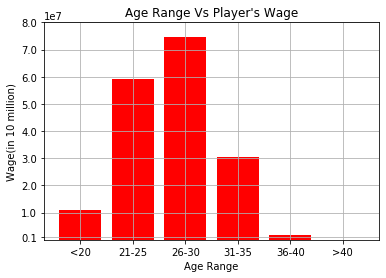

In [17]:
Age_player=age_analysis_df.index
Player_wage=age_analysis_df['Total Wage']
x_axis=np.arange(len(Age_player))
plt.bar(x_axis, Player_wage, color=('red'),  align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Age_player)
plt.yticks([1000000,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000])
#plt.grid(axis='y')
plt.grid()

plt.title("Age Range Vs Player's Wage")
plt.ylabel('Wage(in 10 million)')
plt.xlabel('Age Range')
plt.savefig('Wage.png')

In [18]:
country_analysis_df = pd.DataFrame(new_df.groupby(['Nationality'])[['ID']].count()).reset_index()
country_analysis_df.head()


,Nationality,ID
0,Afghanistan,4
1,Albania,39
2,Algeria,60
3,Andorra,1
4,Angola,15


In [19]:
#Converting 'Players count - grouped(ID)' to integer
country_analysis_df['Players_count'] = country_analysis_df['ID'].astype(int)


In [20]:

country_analysis_df['Players_count'] = country_analysis_df['Players_count'].apply(lambda x: x if x > 100 else 0)
country_analysis_df = country_analysis_df[country_analysis_df.Players_count != 0]
country_analysis_df

,Nationality,ID,Players_count
6,Argentina,935,935
8,Australia,234,234
9,Austria,296,296
13,Belgium,259,259
20,Brazil,825,825
29,Chile,388,388
30,China PR,390,390
31,Colombia,616,616
35,Croatia,126,126
41,Denmark,335,335


In [21]:
# Set x axis and tick locations
x_axis = np.arange(len(country_analysis_df))
tick_locations = [value+0.4 for value in x_axis]

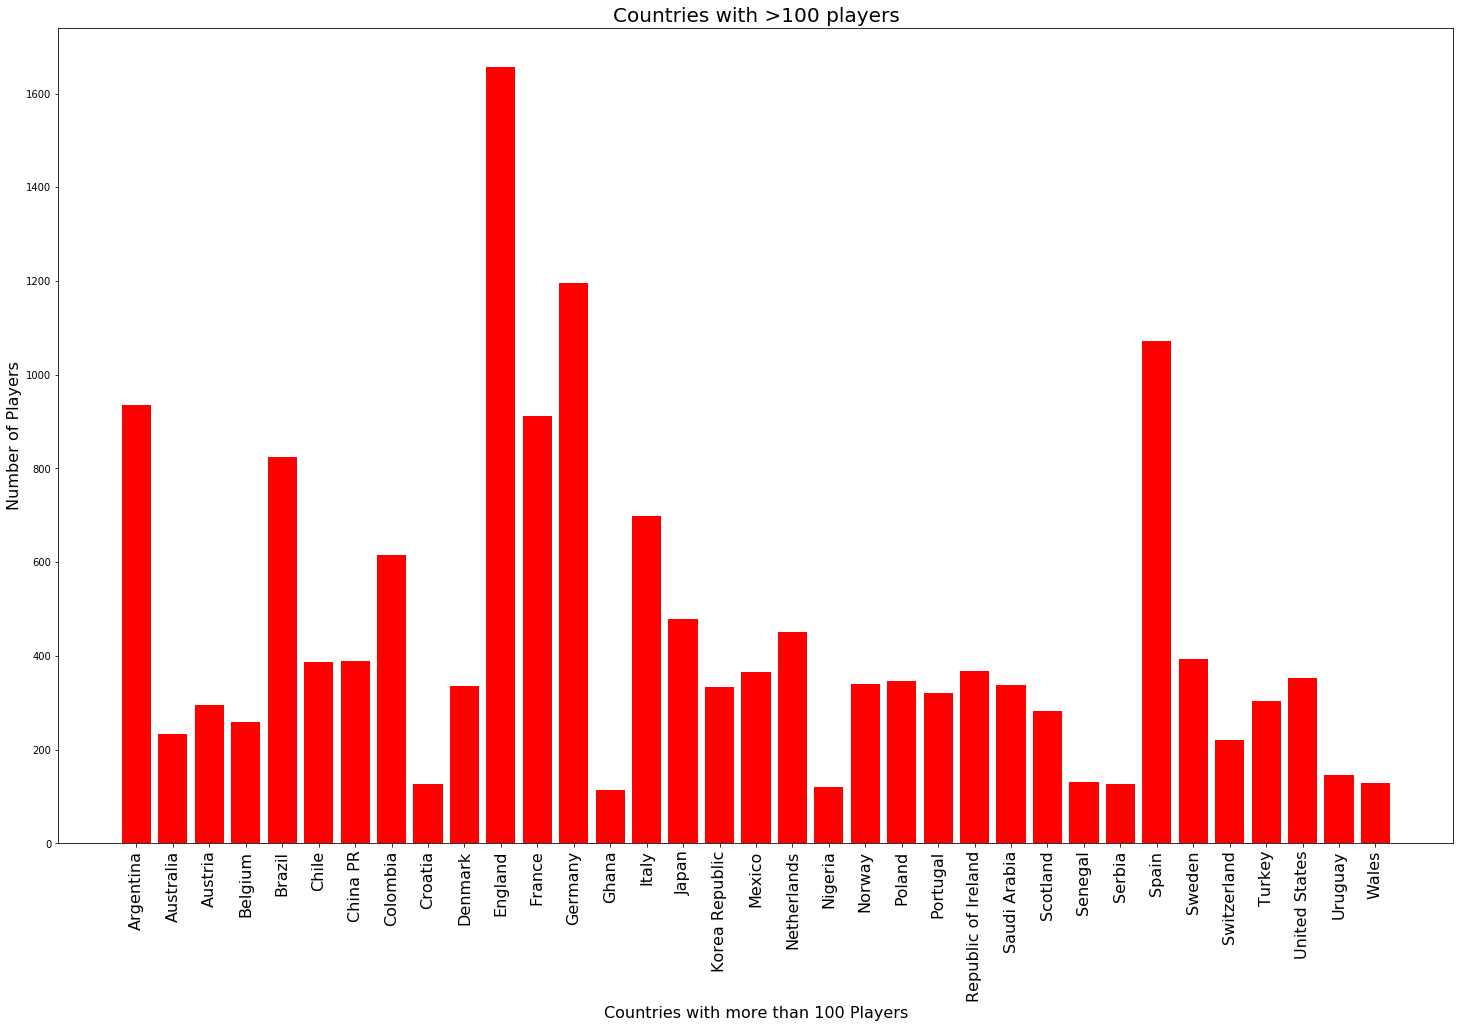

In [22]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(25,15))
plt.bar(x_axis, country_analysis_df["Players_count"], color='r', align="edge")
plt.xticks(tick_locations, country_analysis_df["Nationality"], rotation="vertical",fontsize=16)
plt.title("Countries with >100 players",fontsize=20)
plt.ylabel('Number of Players',fontsize=16)
plt.xlabel('Countries with more than 100 Players',fontsize=16)
plt.savefig('Countries.png')

In [23]:
new_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Age Range'],
      dtype='object')

In [24]:
def getLatLng(country): 
    # Target country
    target_country = country

    # Build the endpoint URL
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
                  'address={0}&key={1}').format(target_country, gkey)
    
    # Run a request to endpoint and convert result to json
    geo_data = requests.get(target_url).json()

    # Extract latitude and longitude
    lat = geo_data["results"][0]["geometry"]["location"]["lat"]
    lng = geo_data["results"][0]["geometry"]["location"]["lng"]
    return lat,lng;   

In [25]:
# row_number = 0
for i, row in country_analysis_df.iterrows():
    lat, lng = getLatLng(row['Nationality'])
    print(row['Nationality'], lat, lng)
    country_analysis_df.at[i, 'Latitude'] = lat
    country_analysis_df.at[i, 'Longitude'] = lng
    
    
# for country in country_analysis_df.Nationality:
#     lat, lng = getLatLng(country)
#     country_analysis_df.iat[row_number, 'Latitude'] = lat
#     country_analysis_df.iat[row_number, 'Longitude'] = lng
# #     country_analysis_df['Latitude'] = country_analysis_df['Latitude'].iloc[row_number] = lat
# #     country_analysis_df['Longitude'] = country_analysis_df['Longitude'].iloc[row_number] = lng
#     row_number = row_number + 1
    

IndexError: list index out of range

In [26]:
print((country_analysis_df))

             Nationality    ID  Players_count   Latitude   Longitude
6              Argentina   935            935 -38.416097  -63.616672
8              Australia   234            234 -25.274398  133.775136
9                Austria   296            296  47.516231   14.550072
13               Belgium   259            259  50.503887    4.469936
20                Brazil   825            825 -14.235004  -51.925280
29                 Chile   388            388 -35.675147  -71.542969
30              China PR   390            390  41.666341  -70.928557
31              Colombia   616            616   4.570868  -74.297333
35               Croatia   126            126  45.100000   15.200000
41               Denmark   335            335  56.263920    9.501785
46               England  1657           1657  52.355518   -1.174320
55                France   911            911  46.227638    2.213749
59               Germany  1195           1195  51.165691   10.451526
60                 Ghana   114    

In [27]:
subset = country_analysis_df[['Latitude', 'Longitude']]
tuples = [tuple(x) for x in subset.values]
print(tuples)
# latlong_a = list(zip(*country_analysis_df[c].values.tolist() for c in ['Latitude', 'Longitude']))
                       

[(-38.416097, -63.61667199999999), (-25.274398, 133.775136), (47.516231, 14.550072), (50.503887, 4.469936), (-14.235004, -51.92528), (-35.675147, -71.542969), (41.666341, -70.92855709999999), (4.570868, -74.297333), (45.1, 15.2000001), (56.26392, 9.501785), (52.3555177, -1.1743197), (46.227638, 2.213749), (51.165691, 10.451526), (7.946527, -1.023194), (41.87194, 12.56738), (36.204824, 138.252924), (35.907757, 127.766922), (23.634501, -102.552784), (52.132633, 5.291265999999999), (9.081999, 8.675277), (60.47202399999999, 8.468945999999999), (51.919438, 19.145136), (39.39987199999999, -8.224454), (53.41291, -8.24389), (23.885942, 45.079162), (56.49067119999999, -4.2026458), (14.497401, -14.452362), (44.016521, 21.005859), (40.46366700000001, -3.74922), (60.12816100000001, 18.643501), (46.818188, 8.227511999999999), (38.963745, 35.243322), (37.09024, -95.712891), (-32.522779, -55.765835), (52.1306607, -3.7837117)]


In [28]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

# Assign the marker layer to a variable
markers = gmaps.marker_layer(tuples)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…